# 1. Importing Libraries and Loading dataset

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
sns.set_palette("Set2")

In [88]:
df = pd.read_csv('../dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [89]:
df.shape

(5110, 12)

# 2. Cleaning Data

In [90]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='bmi'>

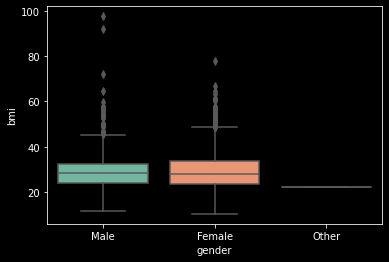

In [91]:
sns.boxplot(x=df['gender'],y=df['bmi'])

<AxesSubplot:xlabel='bmi', ylabel='age'>

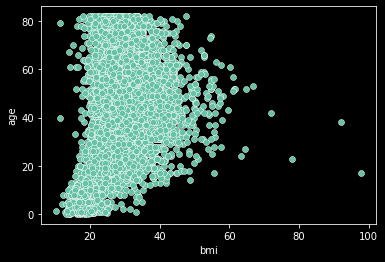

In [92]:
sns.scatterplot(data=df, x='bmi', y='age')

In [93]:
age_group=[]
for i in df['age']:
    if i<2.0:
        age_group.append('Child')
    elif i>2.0 and i<=19.0:
        age_group.append('Teen')
    elif i>19.0 and i<60.0:
        age_group.append('Adult')
    else:
        age_group.append('Elder')

df['age_group'] = age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elder
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Elder
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elder
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elder


In [94]:
fig = px.box(df, x='age_group', y='bmi', color='gender')
fig.show()

In [95]:
def impute_bmi(cols):
    bmi=cols[0]
    age_group = cols[1]
    gender = cols[2]
    if pd.isnull(bmi):
        if age_group == 'Elder':
            if gender == 'Male':
                return 29.0
            else:
                return 28.9
        elif age_group == 'Adult':
            if gender == 'Male':
                return 30.2
            else:
                return 28.8
        elif age_group == 'Teen':
            if gender == 'Male':
                return 20.6
            else:
                return 21.8
        elif age_group == 'Child':
            if gender == 'Male':
                return 18.9
            else:
                return 18.05
    else:
        return bmi
df['bmi'] = df[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elder
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Elder
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elder
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elder
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,Elder
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Elder
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Elder
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.8,Unknown,1,Adult
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Elder


In [96]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

# 3. EDA

In [97]:
df.shape

(5110, 13)

In [98]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.871027,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.718561,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.625000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_group          5110 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 519.1+ KB


In [100]:
df.duplicated().sum()

0

In [101]:
contin_var = ['age','avg_glucose_level','bmi']
cate_var=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in contin_var:
        cate_var.append(i)
cate_var

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_group']

In [102]:
cate_var.append('age_group')
for i in cate_var:
    print('Value in '+ i +':')
    print(df[i].value_counts())

Value in gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
Value in hypertension:
0    4612
1     498
Name: hypertension, dtype: int64
Value in heart_disease:
0    4834
1     276
Name: heart_disease, dtype: int64
Value in ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64
Value in work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Value in Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
Value in smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
Value in age_group:
Adult    2768
Elder    1431
Teen      791
Child     120
Name: age_group, dtype: int64
Value in age_group:
Adult    2768
Elder    1431
Teen      791
Child     120
Name: age_group, dtype: int64


In [103]:
df.drop(index= df[df['gender'] == 'Other'].index[0], axis=0, inplace= True)

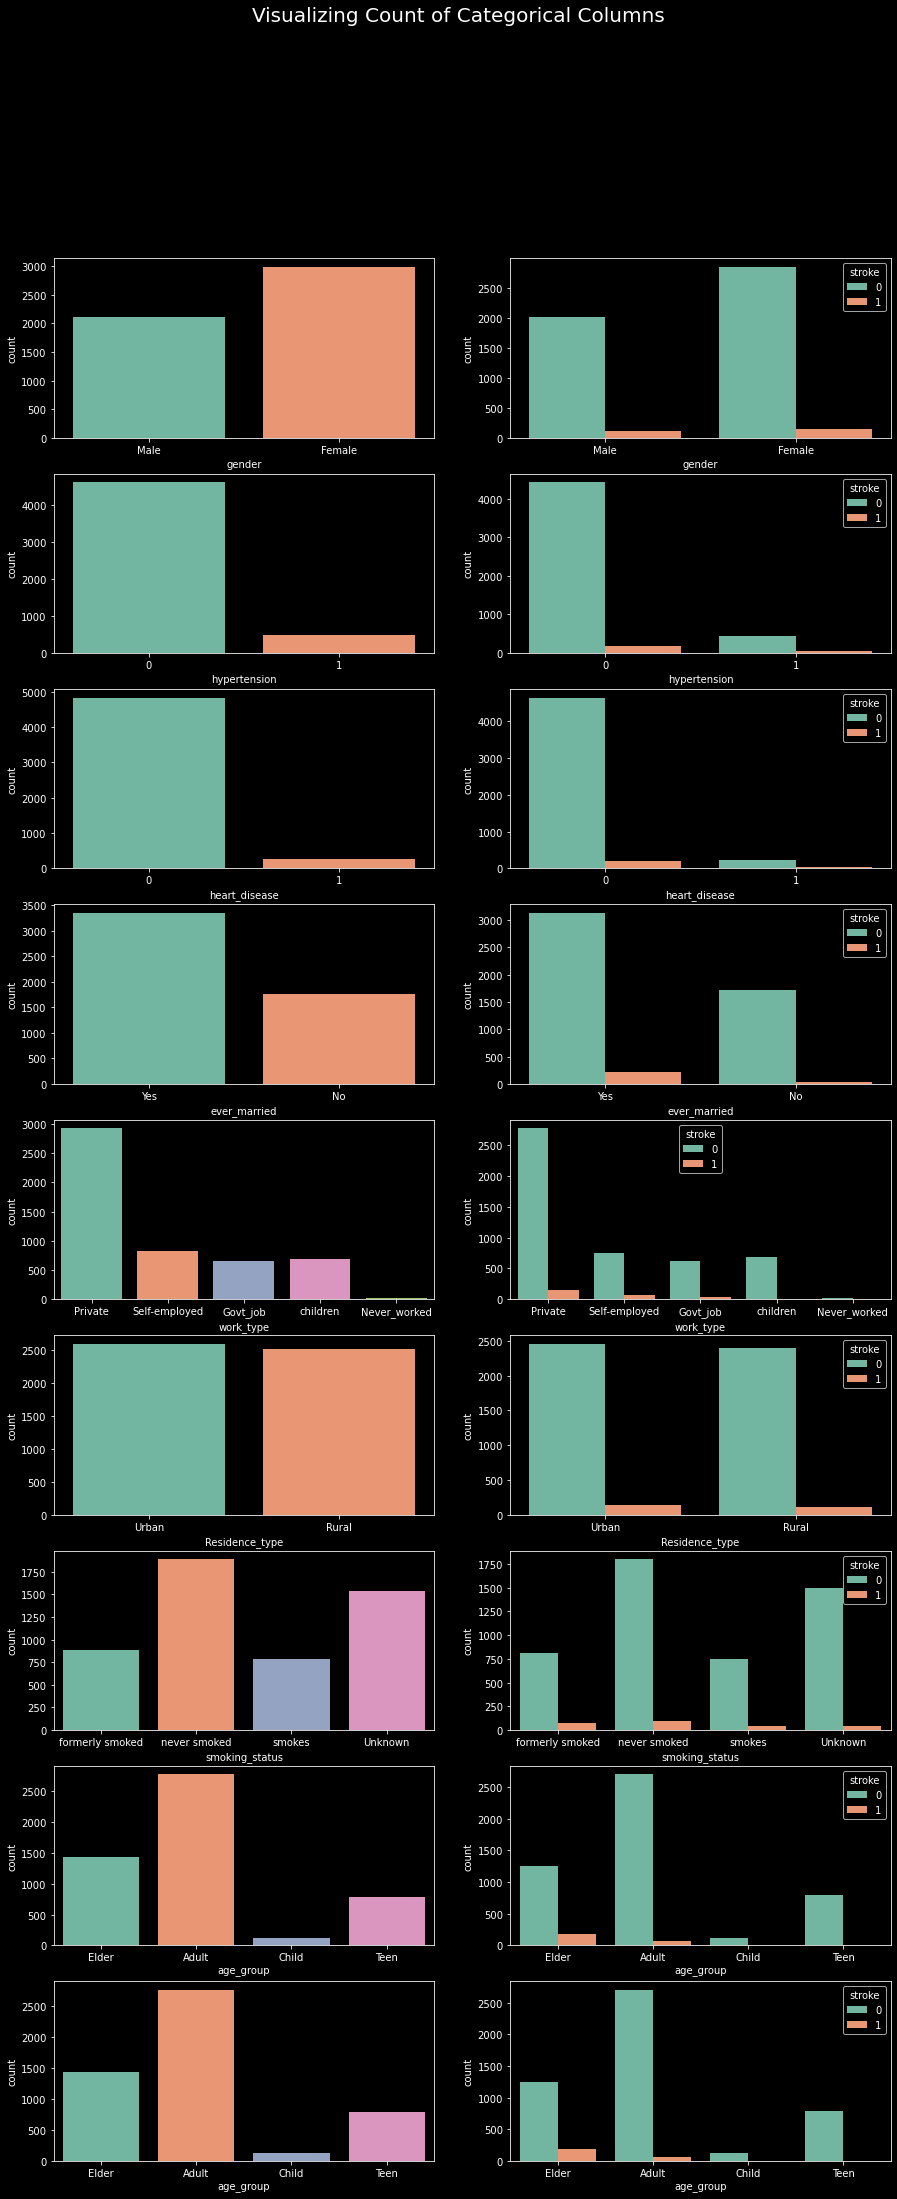

In [104]:
fig,ax=plt.subplots(9,2,figsize=(15,35))
for index,i in enumerate(cate_var):
    plt.suptitle("Visualizing Count of Categorical Columns",size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='stroke')

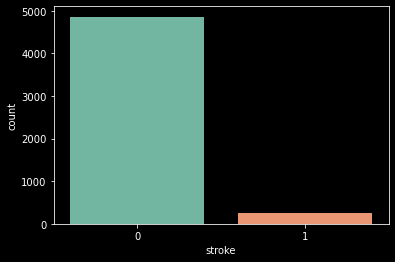

In [105]:
sns.countplot(data=df,x='stroke')
plt.show()

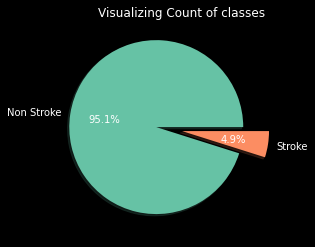

In [106]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

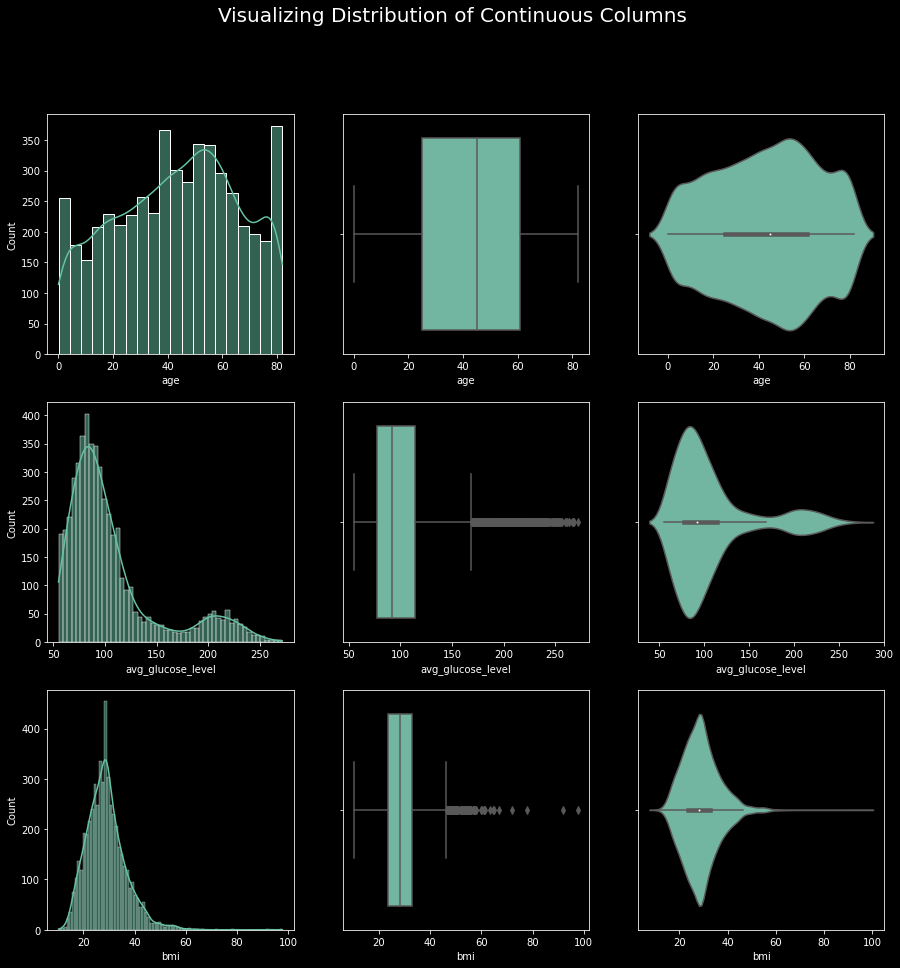

In [107]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(contin_var):
    plt.suptitle("Visualizing Distribution of Continuous Columns",size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

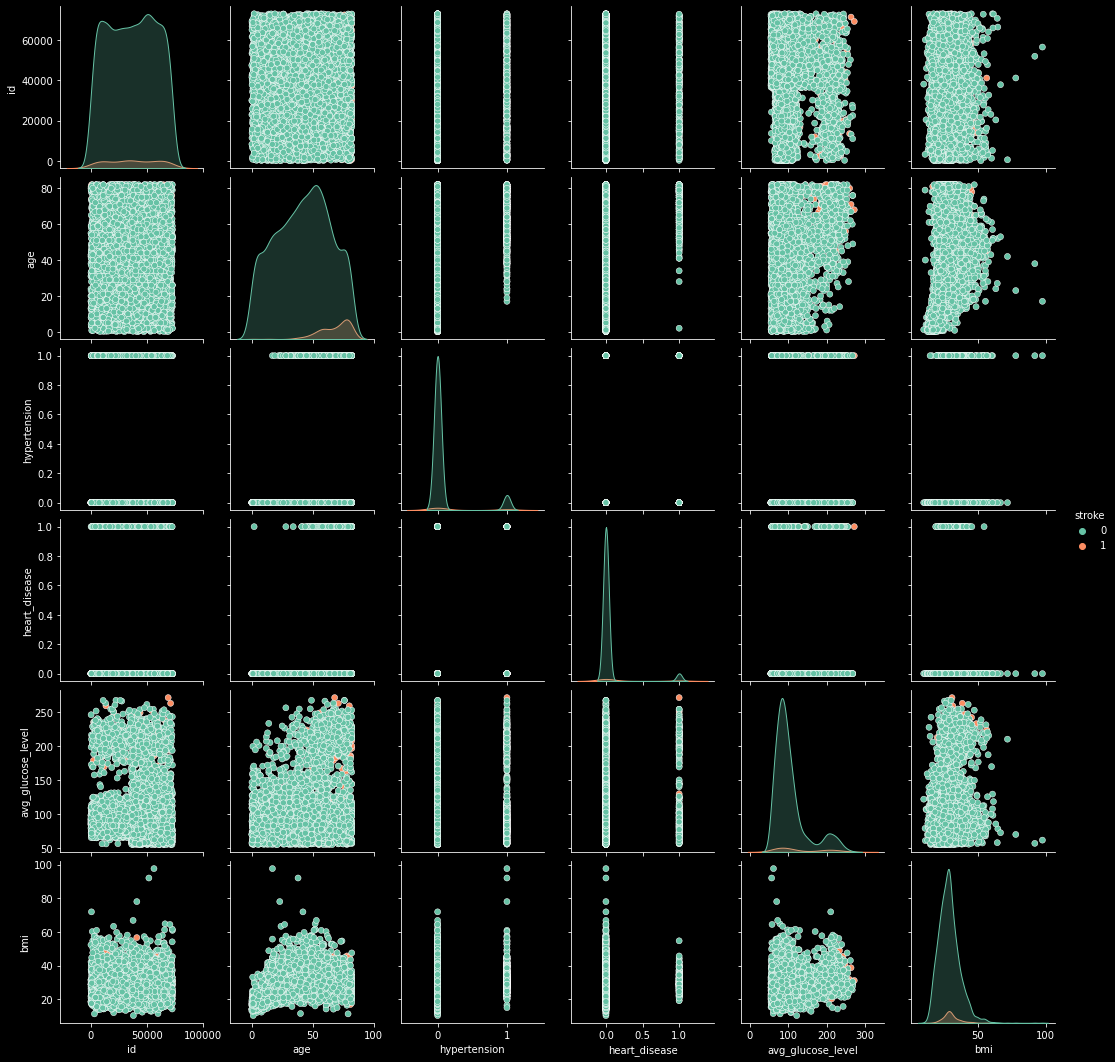

In [108]:
sns.pairplot(data=df,hue='stroke')

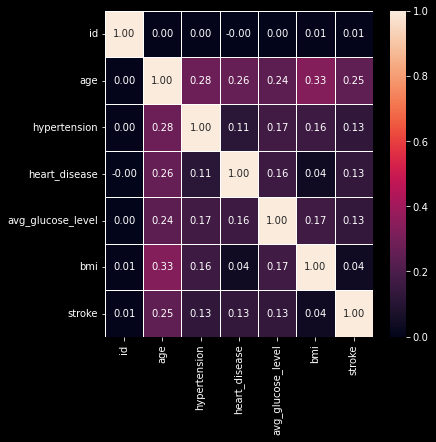

In [109]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')
plt.show()

# 4. Data Preprocessing

| Encoding of categorical data

In [110]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elder
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Elder
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elder
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Elder


In [111]:
cate_var.pop()
cate_var.pop()
print(cate_var)
df_enc = pd.get_dummies(df[cate_var],drop_first=True)
df_enc.head()

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,1,1,0,1,0,0,1,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,1,0,0,0,1,0


In [112]:
df[df_enc.columns]=df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0


In [113]:
df.drop(cate_var,axis=1, inplace=True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,age_group,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,Elder,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,202.21,28.9,1,Elder,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,Elder,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,Adult,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.0,1,Elder,0,1,0,0,1,0,0,0,1,0


In [114]:
df_final = df.drop(['id','age_group'],axis=1)
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


| Oversampling of Minority Class

In [115]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df_final.drop(['stroke'],axis=1)
y=df_final['stroke']
X_over, y_over = oversample.fit_resample(X, y)

| Spliting into train and test set

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

| Scaling of numerical columns

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[contin_var]=scaler.fit_transform(X_train[contin_var])
X_test[contin_var]=scaler.transform(X_test[contin_var])
X_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
9192,0.738363,-0.661402,-0.068567,1,1,0,1,0,0,1,0,0,1
3629,0.152418,1.577873,1.454618,1,1,0,0,0,0,0,0,1,0
9526,-0.253237,-0.241402,0.348153,1,0,0,1,0,0,0,0,0,1
539,-0.523673,-0.678311,3.164609,0,1,0,1,0,0,0,0,0,0
5479,0.107345,1.798964,0.103869,1,0,0,0,0,0,1,0,0,0


# 5. Model Building

| Support Vector Machine (SVM)

In [118]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [119]:
from sklearn.model_selection import GridSearchCV
param = {'C':[0.01,0.1,1,10], 'gamma': [0.01,0.1,1,10]}
optimal_param = GridSearchCV(SVC(), param, cv=5)
optimal_param.fit(X_train,y_train)
print(optimal_param.best_params_)

{'C': 1, 'gamma': 10}


In [120]:
clf_svm = SVC(random_state=42, C=1, gamma= 10)
clf_svm.fit(X_train,y_train)

SVC(C=1, gamma=10, random_state=42)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1458
           1       0.98      1.00      0.99      1458

    accuracy                           0.99      2916
   macro avg       0.99      0.99      0.99      2916
weighted avg       0.99      0.99      0.99      2916



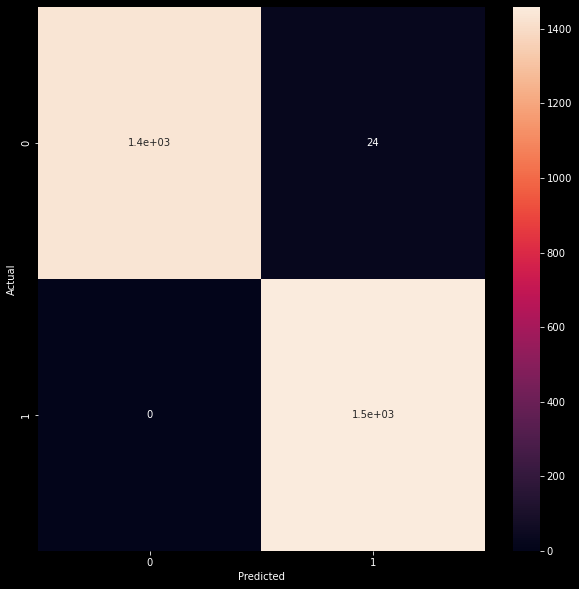

In [121]:
y_pred = clf_svm.predict(X_test)
con_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

| K-nearest neighbor

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [123]:
#define the model: innit K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2)

In [124]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1458
           1       0.79      1.00      0.88      1458

    accuracy                           0.87      2916
   macro avg       0.89      0.87      0.86      2916
weighted avg       0.89      0.87      0.86      2916



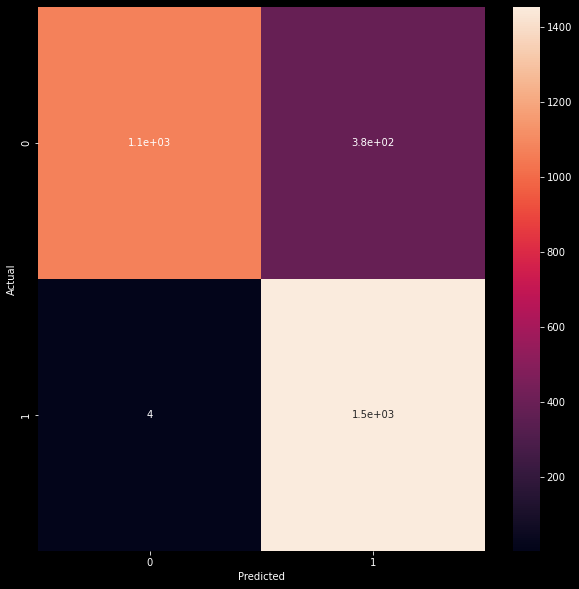

In [125]:
y_pred = classifier.predict(X_test)
con_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

| Logistic Regression

In [126]:
#declare the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1458
           1       0.75      0.83      0.79      1458

    accuracy                           0.78      2916
   macro avg       0.78      0.78      0.78      2916
weighted avg       0.78      0.78      0.78      2916



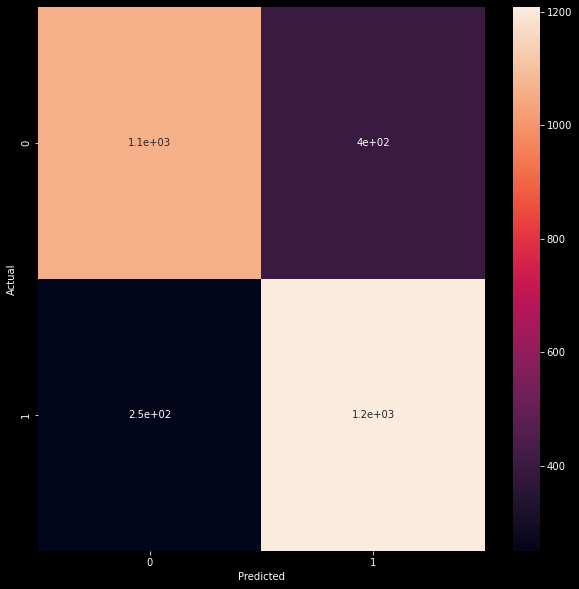

In [127]:
#make the prediction on test set 
y_pred = model.predict(X_test)
con_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

| Random Forest Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier
# create the classifier
clf_rfc = RandomForestClassifier()

# Train the model using the training sets
clf_rfc.fit(X_train, y_train)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1458
           1       0.98      1.00      0.99      1458

    accuracy                           0.99      2916
   macro avg       0.99      0.99      0.99      2916
weighted avg       0.99      0.99      0.99      2916



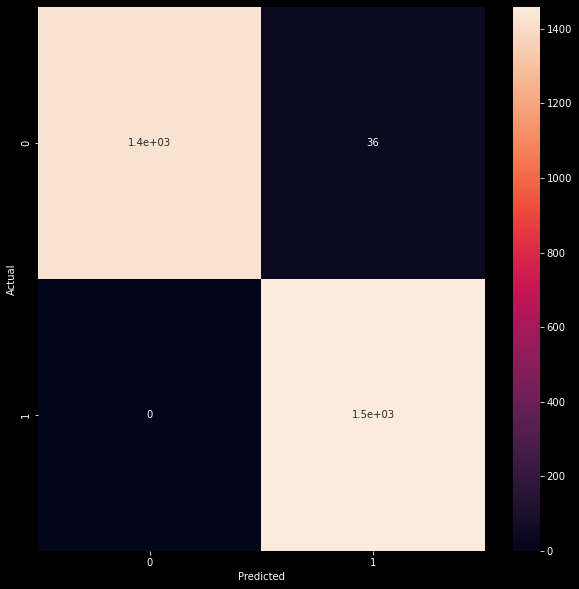

In [129]:
#make the prediction on test set 
y_pred = clf_rfc.predict(X_test)
con_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))